## Working with Tensorflow
In this assignment, you will be familiarized with the usage of the tensorflow library and how to build a model for the MNIST database in two ways
*   using the inbuilt layers in tensorflow
*   using custom layers to replicate the same result



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

2024-12-26 13:00:04.375524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735198204.401685  744726 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735198204.409296  744726 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-26 13:00:04.439332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading and preprocessing the Data
We will directly be using the dataset included in tensorflow library
A detailed description of data is given at (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Heres how the data looks

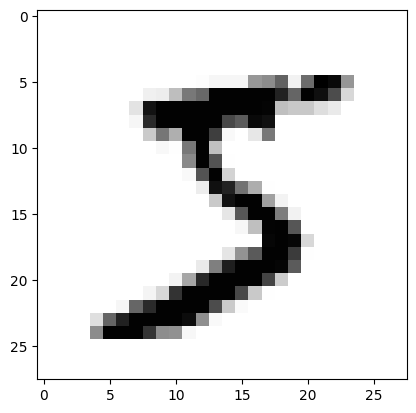

In [3]:
plt.imshow(x_train[0],cmap= 'Greys')

In [4]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

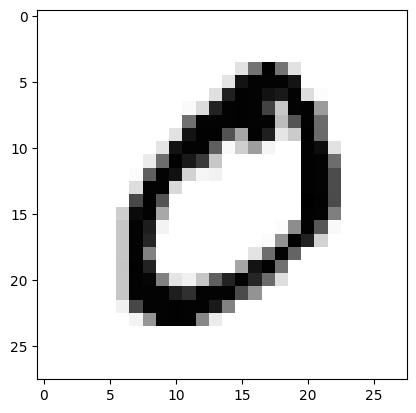

In [5]:
plt.imshow(x_train[1],cmap= 'Greys')

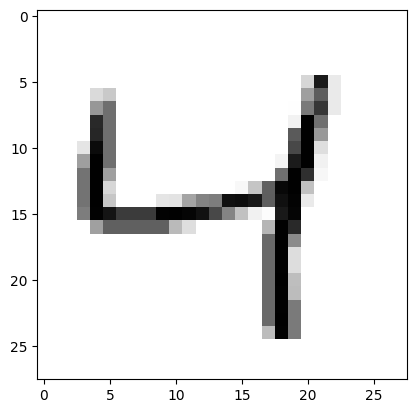

In [6]:
plt.imshow(x_train[2],cmap= 'Greys')

# Making a simple feedforward network
As you have seen in the second week a simple feedfordward network works well to solve MNIST.<br/>
The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [16]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.4845 - val_accuracy: 0.9518 - val_loss: 0.1672
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9607 - loss: 0.1336 - val_accuracy: 0.9622 - val_loss: 0.1246
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0888 - val_accuracy: 0.9699 - val_loss: 0.1036
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0592 - val_accuracy: 0.9700 - val_loss: 0.0986
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9870 - loss: 0.0453 - val_accuracy: 0.9723 - val_loss: 0.0920
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9730 - loss: 0.0952
Test accuracy: 0.9760000109672546


## Making Custom Layers
You can go through this
<a href = 'https://www.tensorflow.org/tutorials/customization/custom_layers'> documentation </a> to get a feel for how to implement a custom layer

* Create a CustomDenseLayer with a Relu Activation
* Create a CustomDenseLayer with a Softmax Activation
* Create a CustomFlatten Layer

Altough we have provided solutions in the Next Cell Try to figure this out on your own.


In [ ]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.num_outputs=units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(int(input_shape[-1]), self.num_outputs), initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w)+self.b
        z = tf.nn.relu(z)
        return tf.matmul(inputs, self.kernel)

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.num_outputs=units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(int(input_shape[-1]), self.num_outputs), initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w)+self.b
        z = tf.nn.softmax(z)
        return tf.matmul(inputs, self.kernel)
    
class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))


In [17]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.softmax(z)
        return z

class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))



## Using out custom layers to Build a model for MNIST

In [21]:
# Example usage of the custom dense layer
model = Sequential([
    CustomFlattenLayer(),
    CustomDenseReluLayer(128),
    CustomDenseSoftmaxLayer(10)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8466 - loss: 0.5522 - val_accuracy: 0.9560 - val_loss: 0.1615
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9577 - loss: 0.1440 - val_accuracy: 0.9680 - val_loss: 0.1132
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9708 - loss: 0.0944 - val_accuracy: 0.9703 - val_loss: 0.1011
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9794 - loss: 0.0675 - val_accuracy: 0.9706 - val_loss: 0.0975
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0514 - val_accuracy: 0.9709 - val_loss: 0.0974
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9679 - loss: 0.1058
Test accuracy: 0.9724000096321106


# Assignment
* Load and preprocess Boston housing dataset
* build a Linear Regression model for it and optimize it using tensorflow (its basically a neural network with a single neuron and no activaton)
* build a Feedforward network for it you can expirement around with no of layers and and neurons in each layer and different activation functions <br/>





In [25]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
dataset=fetch_california_housing()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)

In [32]:
california_model = Sequential(
    [
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(1)
    ]
)

california_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

california_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

test_loss = california_model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 569.9835 - mae: 9.1597 - val_loss: 2.1431 - val_mae: 1.2040
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 2.0001 - mae: 1.0602 - val_loss: 0.9786 - val_mae: 0.8022
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 15.3091 - mae: 1.5092 - val_loss: 1.5373 - val_mae: 0.7418
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 4.9782 - mae: 1.4543 - val_loss: 0.9968 - val_mae: 0.8106
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 3.0644 - mae: 0.9842 - val_loss: 1.4121 - val_mae: 0.8711
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 1.3194 - mae: 0.8627
Test loss: [1.3313324451446533, 0.8606050610542297]


# Bonus Assignment 
* Try solving one more random dataset from kaggle/tensorflow datasets